In [ ]:
import pandas as pd
import numpy as np
import random
import json
import base64
import unicodedata
import time
import requests
from requests.auth import HTTPBasicAuth
from datetime import datetime, date
import ast
import re
import base64
import sys
from pandas_gbq import to_gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
project_id = "spatial-tempo-425409-i2"
client = bigquery.Client(project=project_id)

In [ ]:
db_table = "main_dataset.filtered_data_allteam_nopenalty"
query = f"SELECT * FROM {project_id}.{db_table}"
data = client.query(query).to_dataframe()

data

,type_primary,avg_possession_attack_xg,team_name,possession_team_id
0,free_kick,0.117175,AS FC Buzău,60392.0
1,throw_in,0.068800,AS FC Buzău,60392.0
2,corner,0.188100,AS FC Buzău,60392.0
3,throw_in,0.055633,Botoşani,11634.0
4,free_kick,0.068800,Botoşani,11634.0
5,corner,0.001500,Botoşani,11634.0
6,throw_in,0.056475,CFR Cluj,11611.0
7,free_kick,0.069200,CFR Cluj,11611.0
8,corner,0.134150,CFR Cluj,11611.0
9,free_kick,0.093756,Dinamo Bucureşti,11564.0


In [ ]:
# functie cu parametru pentru compare dinamo cu alte echipa

In [ ]:
def plot_pie_chart(df, team_name):
    """
    Generates a pie chart showing the proportion of avg_possession_attack_xg
    contributed by each primary event type for a specified team.

    Args:
        team_name (str): The name of the team to analyze.
    """
    # Filter data for the specified team
    team_data = df[df['team_name'] == team_name]

    # Check if the team exists in the data
    if team_data.empty:
        print(f"No data found for team: {team_name}")
        return

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(team_data['avg_possession_attack_xg'], labels=team_data['type_primary'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

    # Add a title
    plt.title(f'Proportion of xG by Event Type for {team_name}', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()

    # Show the plot
    plt.show()

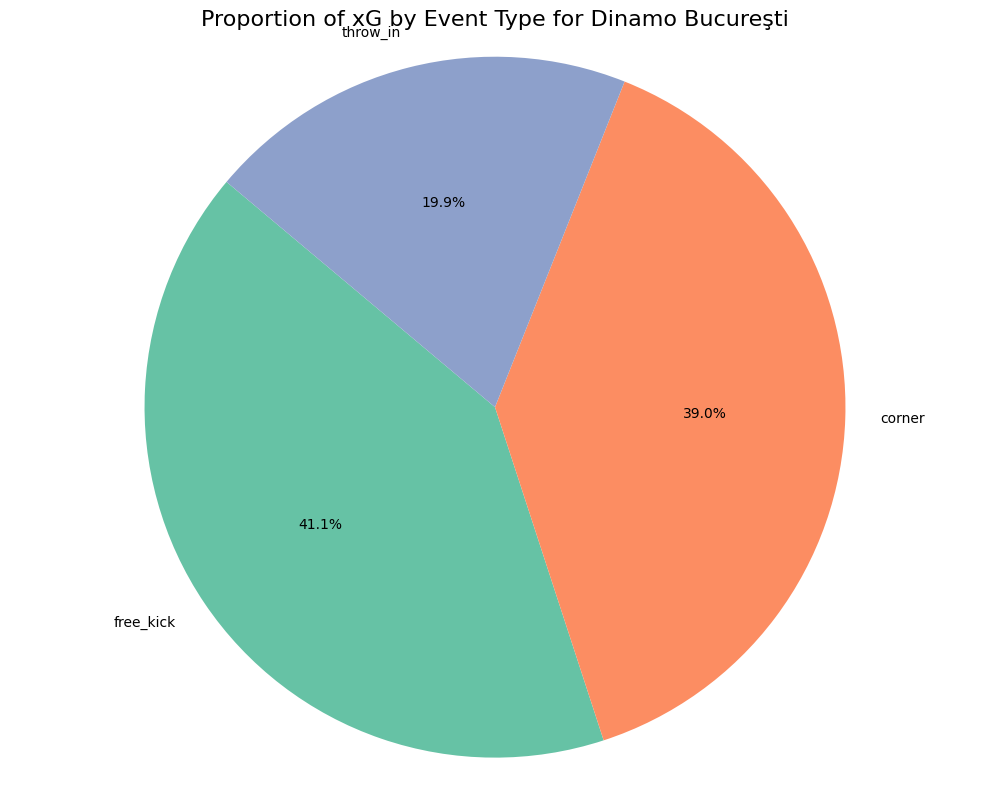

In [ ]:
plot_pie_chart(df=data, team_name="Dinamo Bucureşti")

In [ ]:
def compare_teams_bar_chart(df, opponent_team_name):
    """
    Generates a bar chart comparing the avg_possession_attack_xg for Dinamo Bucureşti
    and a specified opponent across all event types.

    Args:
        opponent_team_name (str): The name of the team to compare against Dinamo Bucureşti.
    """
    # Filter the DataFrame for the two teams
    team1_data = df[df['team_name'] == 'Dinamo Bucureşti']
    team2_data = df[df['team_name'] == opponent_team_name]

    # Combine the data for plotting
    combined_data = pd.concat([team1_data, team2_data])

    # Create the bar chart
    plt.figure(figsize=(12, 7))
    sns.barplot(data=combined_data, x='type_primary', y='avg_possession_attack_xg', hue='team_name', palette='viridis')

    # Add titles and labels for clarity
    plt.title(f'Comparison of xG: Dinamo Bucureşti vs {opponent_team_name}', fontsize=16)
    plt.xlabel('Event Type', fontsize=12)
    plt.ylabel('Average xG per Possession', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Team')
    plt.tight_layout()

    # Show the plot
    plt.show()

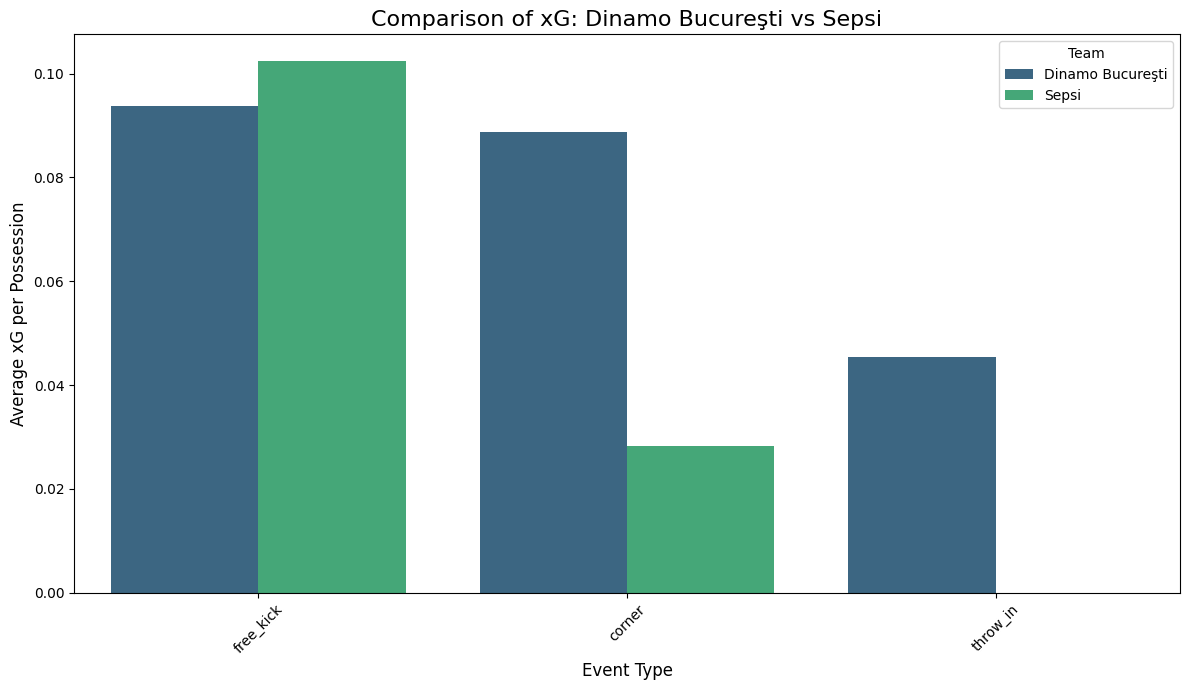

In [ ]:
compare_teams_bar_chart(df=data, opponent_team_name="Sepsi")

In [ ]:
def plot_heatmap(df):
    """
    Generates a heatmap to display the avg_possession_attack_xg for each team
    across all primary event types.
    """
    # Pivot the data to create a matrix of teams vs. event types
    heatmap_data = df.pivot_table(values='avg_possession_attack_xg', index='team_name', columns='type_primary')
    heatmap_data = heatmap_data.fillna(0)

    # Create the heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis', linewidths=.5)

    # Add titles and labels
    plt.title('Heatmap of Average xG per Event Type for Each Team', fontsize=16)
    plt.xlabel('Event Type', fontsize=12)
    plt.ylabel('Team', fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

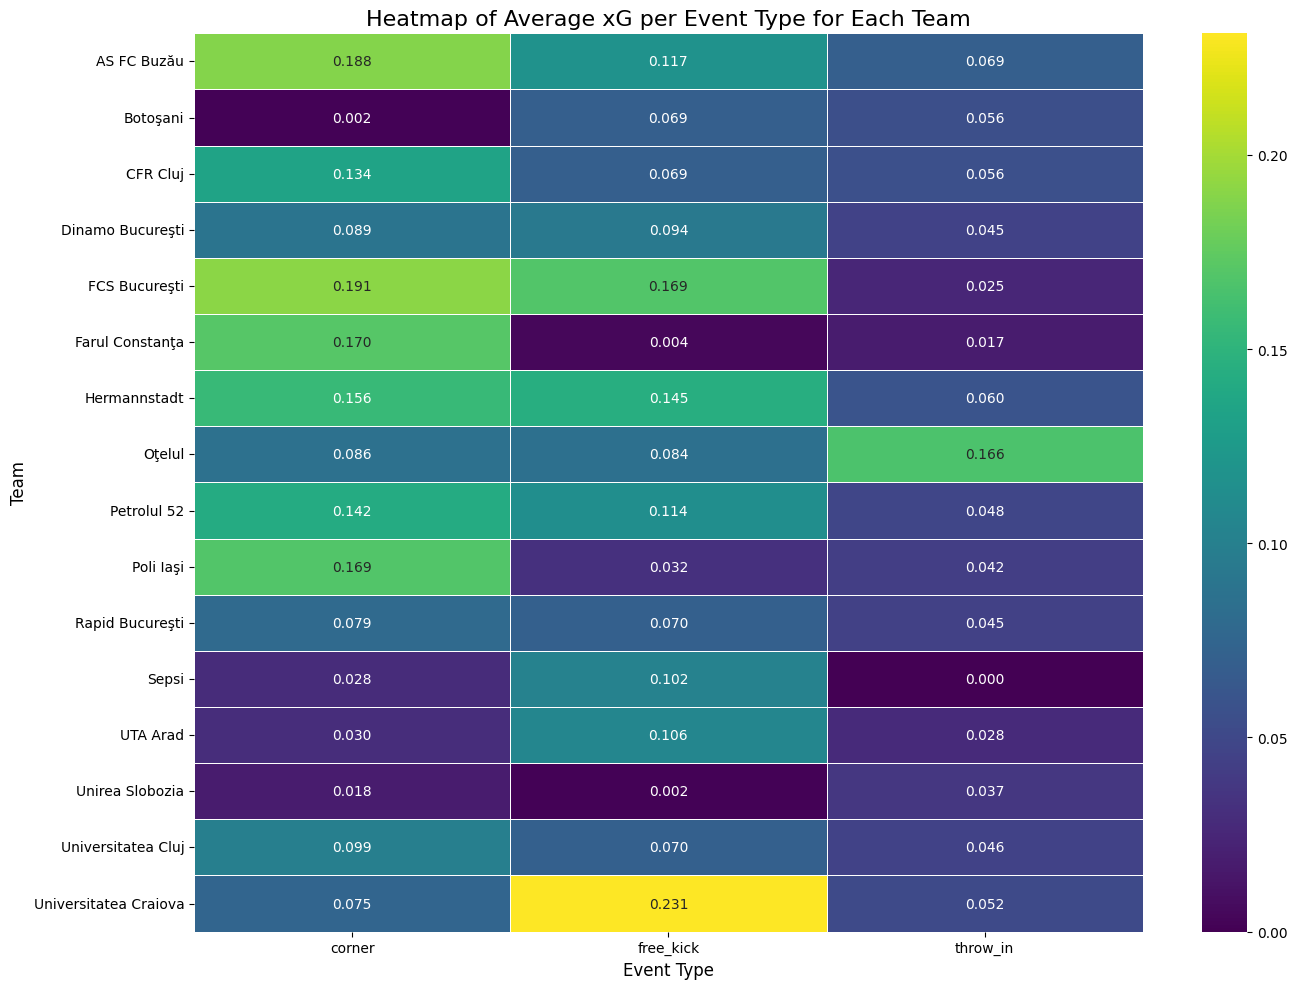

In [ ]:
plot_heatmap(df=data)

In [ ]:
def plot_scatter(df):
    """
    Visualizes the distribution of avg_possession_attack_xg values for all teams
    across all event types using a scatter plot.
    """
    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='type_primary', y='avg_possession_attack_xg', hue='team_name', s=100, palette='tab20')

    # Add titles and labels
    plt.title('Distribution of xG Values Across All Teams and Events', fontsize=16)
    plt.xlabel('Event Type', fontsize=12)
    plt.ylabel('Average xG', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()

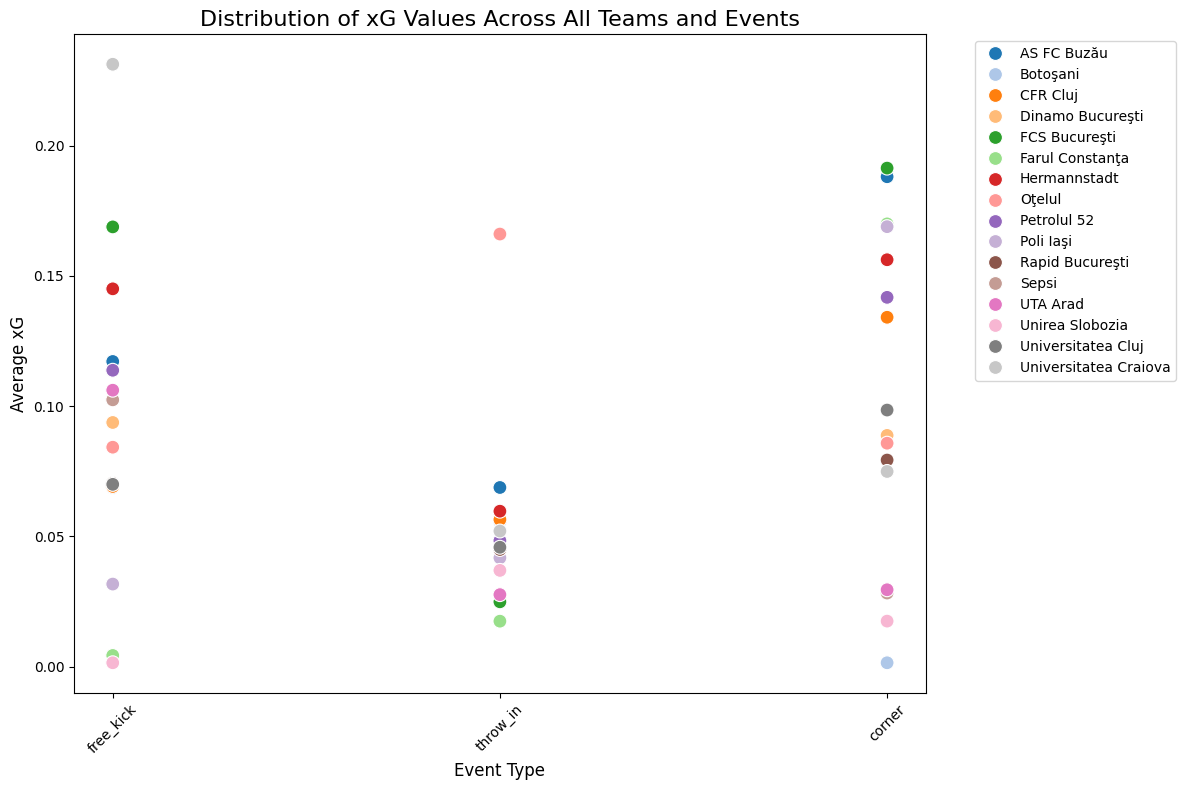

In [ ]:
plot_scatter(df=data)

In [ ]:
def plot_radar_chart(df, team_name):
    """
    Creates a radar chart to visualize a single team's xG profile across
    different set-piece events.

    Args:
        team_name (str): The name of the team to analyze.
    """
    if df.empty:
        print("DataFrame is empty. Cannot generate plot.")
        return

    team_data = df[df['team_name'] == team_name]

    if team_data.empty:
        print(f"No data found for team: {team_name}")
        return

    # Prepare data for the radar chart
    labels = team_data['type_primary'].values
    stats = team_data['avg_possession_attack_xg'].values

    # The number of variables we're plotting.
    num_vars = len(labels)

    # Compute angle for each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The radar chart needs to be a closed loop, so we repeat the first value.
    stats = np.concatenate((stats,[stats[0]]))
    angles += angles[:1]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Draw one axe per variable + add labels
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels, fontsize=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.yaxis.grid(True)

    # Plot data
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Add a title
    plt.title(f'xG Profile for {team_name}', size=16, y=1.1)
    plt.show()


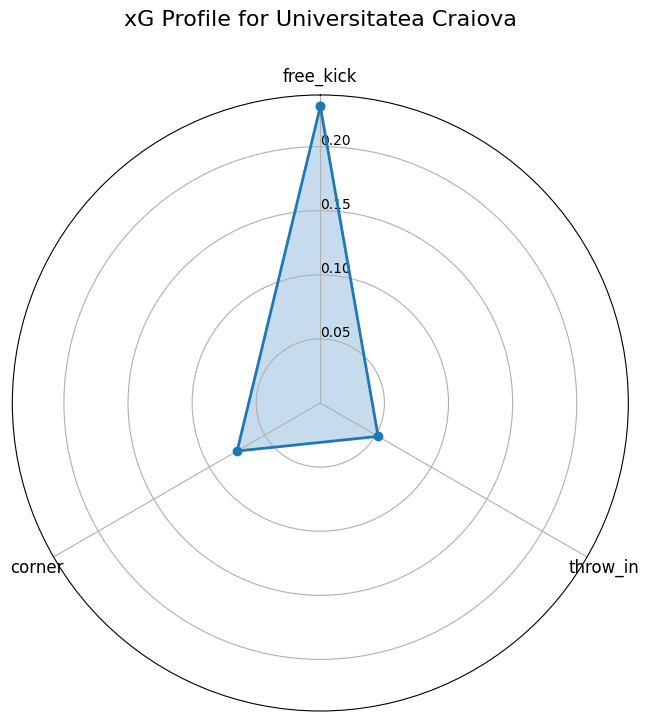

In [ ]:
plot_radar_chart(df=data, team_name="Universitatea Craiova")

In [ ]:
def plot_stacked_bar_chart(df, team_name=None):
    """
    Generates a stacked bar chart to show the xG composition.
    Can display data for a single specified team or for all teams.

    Args:
        team_name (str, optional): The name of the team to display.
                                   If None or omitted, a chart for all teams is generated.
                                   Defaults to None.
    """
    if df.empty:
        print("DataFrame is empty. Cannot generate plot.")
        return

    data_to_plot = df
    title = 'xG Composition by Team and Event Type'
    figsize = (16, 10)
    xtick_rotation = 45

    # If a specific team is requested, filter the dataframe and adjust plot settings
    if team_name:
        data_to_plot = df[df['team_name'] == team_name]
        if data_to_plot.empty:
            print(f"No data found for team: {team_name}")
            return
        title = f'xG Composition for {team_name}'
        figsize = (8, 7)  # Smaller figure size for a single team
        xtick_rotation = 0 # No rotation needed for one team

    # Pivot the data to get xG for each event type per team
    pivot_df = data_to_plot.pivot_table(index='team_name', columns='type_primary', values='avg_possession_attack_xg', fill_value=0)

    # Sort teams by total xG only when plotting all teams
    if not team_name:
        pivot_df['total_xg'] = pivot_df.sum(axis=1)
        pivot_df = pivot_df.sort_values(by='total_xg', ascending=False).drop(columns='total_xg')

    # Create the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=figsize, colormap='viridis')

    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Team' if not team_name else '', fontsize=12)  # No x-axis label for a single team
    plt.ylabel('Average xG', fontsize=12)
    plt.xticks(rotation=xtick_rotation, ha='right')
    plt.legend(title='Event Type')
    plt.tight_layout()
    plt.show()

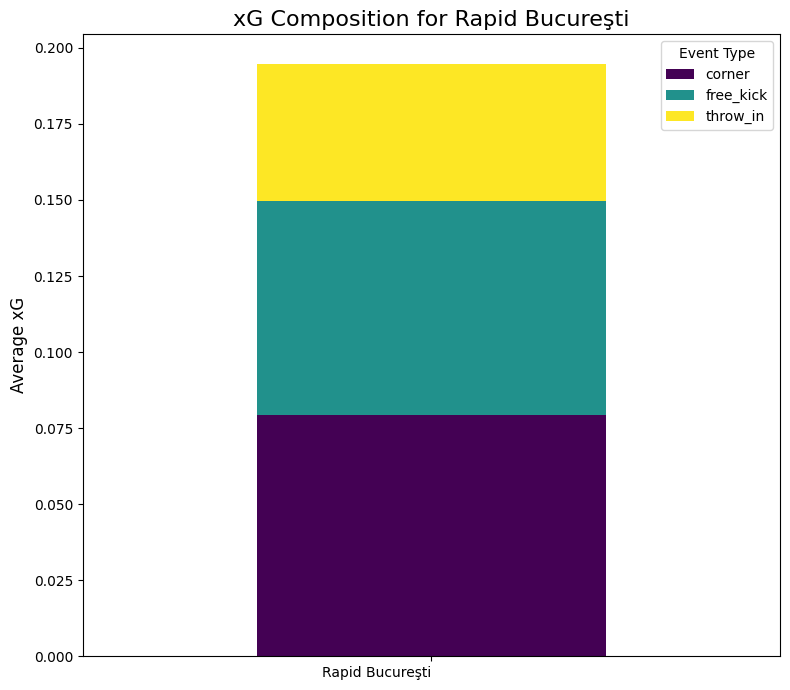

In [ ]:
plot_stacked_bar_chart(df=data, team_name="Rapid Bucureşti")

In [ ]:
def plot_top_teams_by_event(df, event_type, top_n=10):
    """
    Creates a horizontal bar chart to rank teams by their avg_possession_attack_xg
    for a specific event type.

    Args:
        event_type (str): The event type to analyze (e.g., 'corner', 'free_kick').
        top_n (int): The number of top teams to display.
    """
    if df.empty:
        print("DataFrame is empty. Cannot generate plot.")
        return

    # Filter data for the specified event type and sort by xG
    event_data = df[df['type_primary'] == event_type].sort_values(by='avg_possession_attack_xg', ascending=False).head(top_n)

    if event_data.empty:
        print(f"No data found for event type: {event_type}")
        return

    # Create the horizontal bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='avg_possession_attack_xg', y='team_name',hue='team_name',legend=False, data=event_data, palette='viridis')

    # Add titles and labels
    plt.title(f'Top {top_n} Teams by xG from {event_type.replace("_", " ").title()}', fontsize=16)
    plt.xlabel('Average xG per Possession', fontsize=12)
    plt.ylabel('Team', fontsize=12)
    plt.tight_layout()
    plt.show()

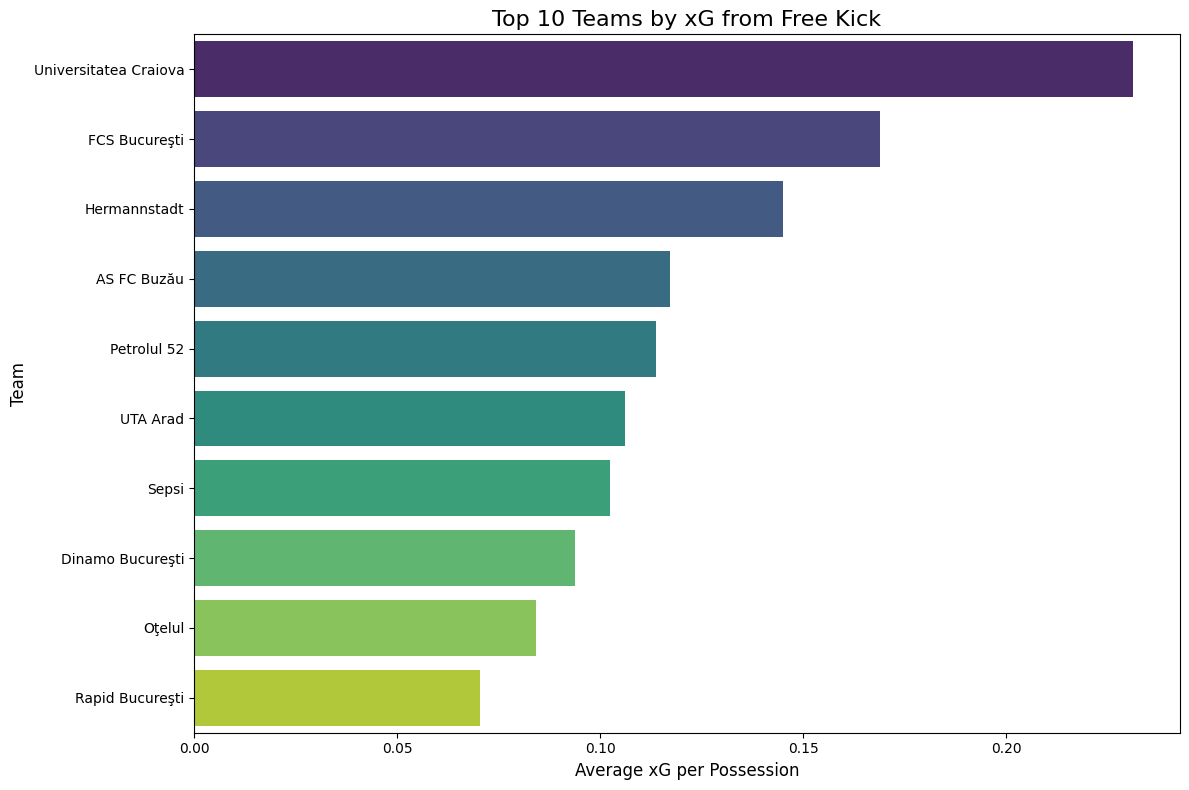

In [ ]:
plot_top_teams_by_event(df=data, event_type="free_kick")